In [1]:
#dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import census_key, create variable for County Business Patterns API query
from api_keys import census_key
url = "https://api.census.gov/data/2018/cbp"

#group variable for number of employees stored
num_employed = "EMP"

#store state and county ID in variables
Cali = "06"
LA = "037"
SF = "075"

#create empty list to fill with number of people employed each iteration
LA_employed = []
SF_employed = []

#create list of NAICS2017 codes to iterate through
codes_list = [7225, 6221, 5121, 4451, 6211, 6214, 7211,
              6231, 4811, 8121, 6244, 44611, 6215, 7131,
              7224, 6219, 7111, 7121, 7112, 4854]

#loop through list of industry codes and perform a request for total number of employees
counter = 1
for id in codes_list:
    LA_resp = requests.get(f"{url}?get={num_employed}&for=county:{LA}&in=state:{Cali}&NAICS2017={id}&key={census_key}").json()
    try:
        LA_employed.append(LA_resp[1][0])
        print(f"Process #{counter} at NAICS2017 code:{id}...")
        counter = counter + 1
    except:
        print("Data not found")
        pass    

Process #1 at NAICS2017 code:7225...
Process #2 at NAICS2017 code:6221...
Process #3 at NAICS2017 code:5121...
Process #4 at NAICS2017 code:4451...
Process #5 at NAICS2017 code:6211...
Process #6 at NAICS2017 code:6214...
Process #7 at NAICS2017 code:7211...
Process #8 at NAICS2017 code:6231...
Process #9 at NAICS2017 code:4811...
Process #10 at NAICS2017 code:8121...
Process #11 at NAICS2017 code:6244...
Process #12 at NAICS2017 code:44611...
Process #13 at NAICS2017 code:6215...
Process #14 at NAICS2017 code:7131...
Process #15 at NAICS2017 code:7224...
Process #16 at NAICS2017 code:6219...
Process #17 at NAICS2017 code:7111...
Process #18 at NAICS2017 code:7121...
Process #19 at NAICS2017 code:7112...
Process #20 at NAICS2017 code:4854...


In [3]:
#same operations to grab data for same industries in San Francisco
counter = 1
for id in codes_list:
    SF_resp = requests.get(f"{url}?get={num_employed}&for=county:{SF}&in=state:{Cali}&NAICS2017={id}&key={census_key}").json()
    try:
        SF_employed.append(SF_resp[1][0])
        print(f"Process #{counter} at NAICS2017 code:{id}...")
        counter = counter + 1
    except:
        print("Data not found")
        pass    

Process #1 at NAICS2017 code:7225...
Process #2 at NAICS2017 code:6221...
Process #3 at NAICS2017 code:5121...
Process #4 at NAICS2017 code:4451...
Process #5 at NAICS2017 code:6211...
Process #6 at NAICS2017 code:6214...
Process #7 at NAICS2017 code:7211...
Process #8 at NAICS2017 code:6231...
Process #9 at NAICS2017 code:4811...
Process #10 at NAICS2017 code:8121...
Process #11 at NAICS2017 code:6244...
Process #12 at NAICS2017 code:44611...
Process #13 at NAICS2017 code:6215...
Process #14 at NAICS2017 code:7131...
Process #15 at NAICS2017 code:7224...
Process #16 at NAICS2017 code:6219...
Process #17 at NAICS2017 code:7111...
Process #18 at NAICS2017 code:7121...
Process #19 at NAICS2017 code:7112...
Process #20 at NAICS2017 code:4854...


In [4]:
#create list of descriptons for each industry
industry_list = ["Restaurants and Other Eating Places", "General Medical and Surgical Hospitals",
                 "Motion Picture and Video Industries", "Grocery Stores", "Offices of Physicians",
                 "Outpatient Care Centers", "Traveler Accomodation", "Nursing Care Facilities (Skilled Nursing Facilities)",
                 "Scheduled Air Transportation", "Personal Care Services", "Child Day Care Services",
                 "Pharmacies and Drug Stores", "Medical and Diagnostic Laboratories", "Amusement Parks and Arcades",
                 "Drinking Places (Alcholic Beverages)", "Other Ambulatory Health Care Services",
                 "Performing Art Companices", "Museums, Historical Sites, and Similar Institutions",
                 "Spectator Sports", "School and Employee Bus Transportation"]
#put the three lists into a dataframe
LASF_employment = pd.DataFrame({"Industry": industry_list, "Los Angeles": LA_employed, "San Francisco": SF_employed})

In [5]:
#read in census info you made; grab county population size
LASF_census = pd.read_csv("Resources/LASF_Census2018.csv")
LA_pop = LASF_census.iloc[0, 1]
SF_pop = LASF_census.iloc[1, 1]

#convert columns from object to integer for calculations
LASF_employment["Los Angeles"] = LASF_employment["Los Angeles"].astype(int)
LASF_employment["San Francisco"] = LASF_employment["San Francisco"].astype(int)

#create new columns for total employment per capita, to make comparisons
LASF_employment["LA Per Capita"] = (LASF_employment["Los Angeles"]/LA_pop) * 100000
LASF_employment["SF Per Capita"] = (LASF_employment["San Francisco"]/SF_pop) * 100000

#export as csv for use elsewhere
LASF_employment.to_csv("Resources/LASF_employment.csv", index=False, header=True)
LASF_employment

,Industry,Los Angeles,San Francisco,LA Per Capita,SF Per Capita
0,Restaurants and Other Eating Places,372966,57904,3693.445033,6655.295594
1,General Medical and Surgical Hospitals,148972,23921,1475.254831,2749.401180
2,Motion Picture and Video Industries,91028,3574,901.441189,410.783822
3,Grocery Stores,80452,7553,796.708118,868.117015
4,Offices of Physicians,58306,4723,577.398492,542.846109
5,Outpatient Care Centers,56402,5306,558.543371,609.854214
6,Traveler Accomodation,51021,19346,505.255865,2223.565705
7,Nursing Care Facilities (Skilled Nursing Facil...,46396,2034,459.454952,233.781280
8,Scheduled Air Transportation,21992,98,217.784579,11.263798
9,Personal Care Services,22443,3763,222.250787,432.506862


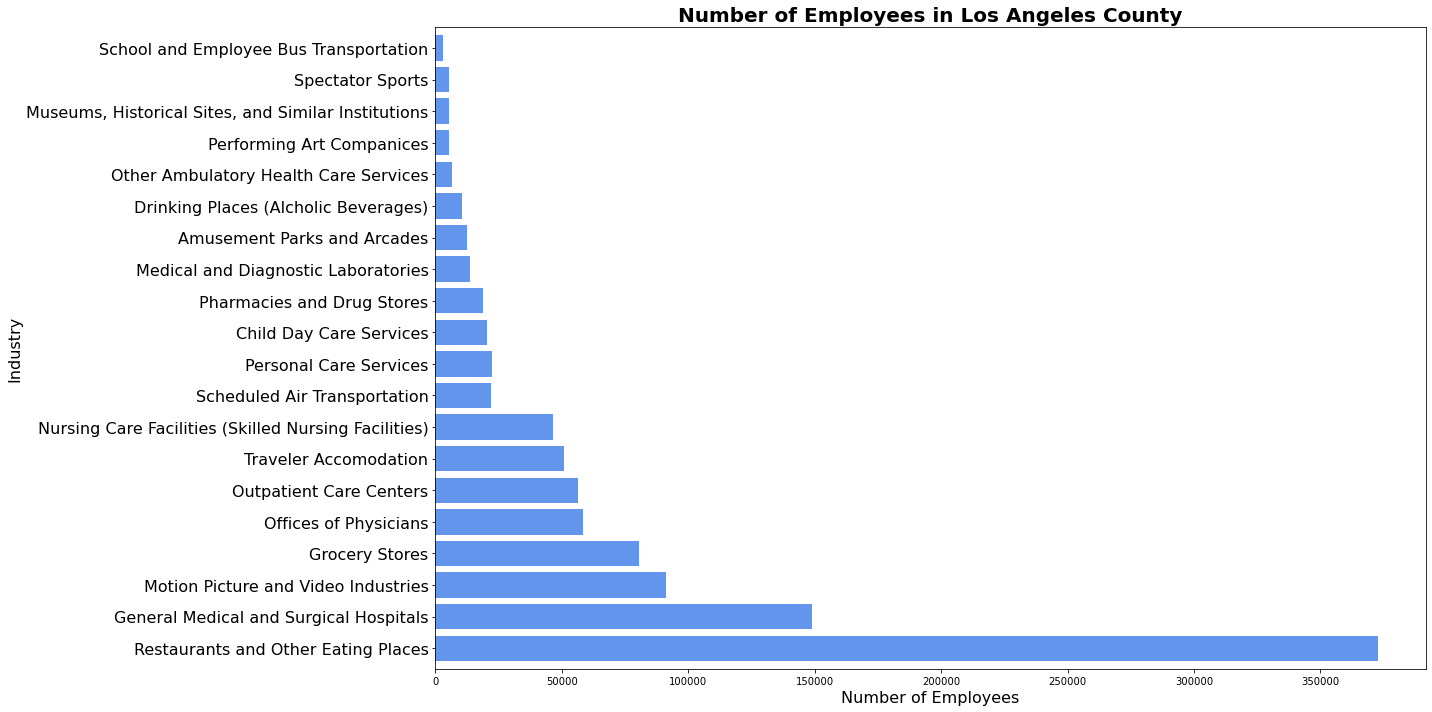

In [6]:
#create a series to plot based on the column for number of employees in Los Angeles
LA_dict = LASF_employment["Los Angeles"]

#plot a horizontal bar graph of Los Angeles County's employment numbers per industry
LA_hbar = LA_dict.plot.barh(x=industry_list, y=LA_employed, facecolor="cornflowerblue", width=0.8, figsize=(20,10))

#set all labels and title
LA_hbar.set_yticklabels(industry_list, rotation="horizontal", fontsize=16)
LA_hbar.set_xlabel("Number of Employees", fontsize=16)
LA_hbar.set_ylabel("Industry", fontsize=16)
LA_hbar.set_title("Number of Employees in Los Angeles County", fontsize=20, fontweight="bold")


plt.tight_layout()
plt.savefig("Output_data/LA_employees.png", dpi=300)
plt.show()

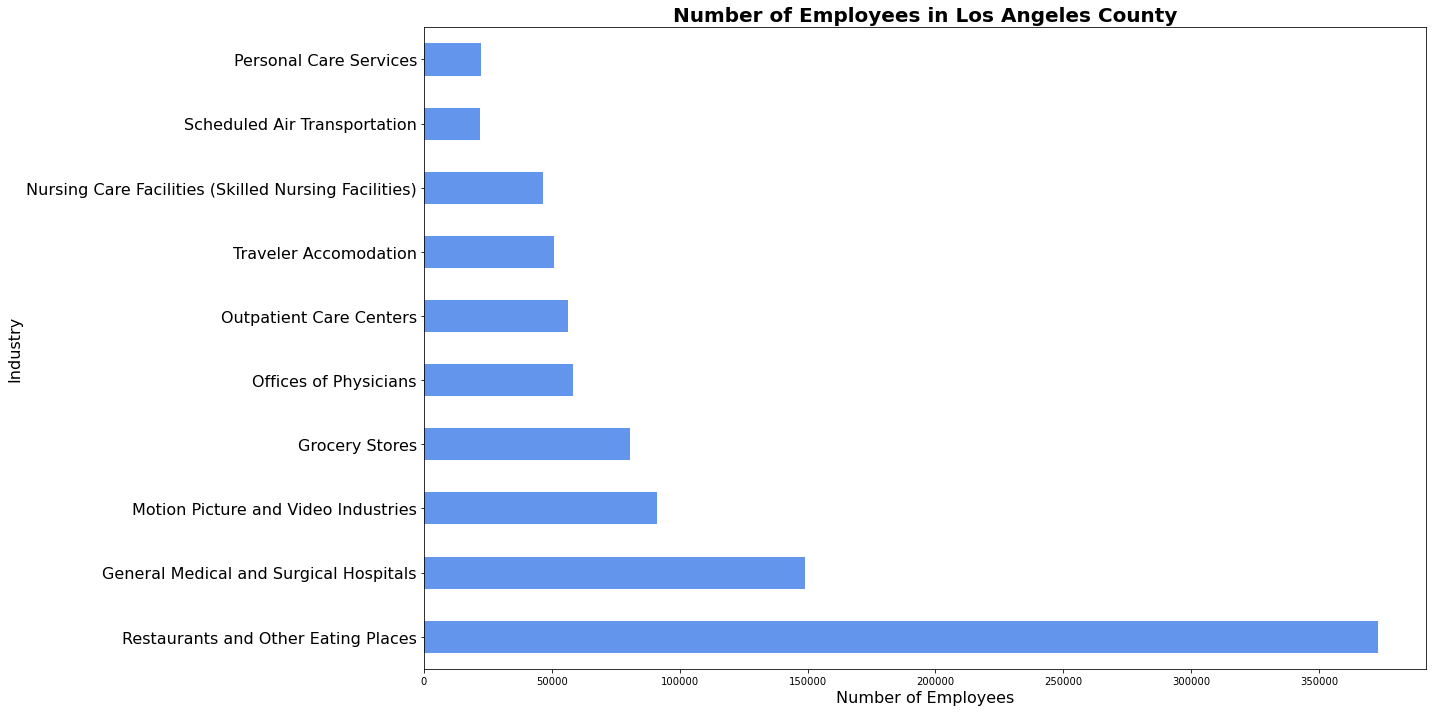

In [7]:
#create a new series and axis lists to plot by only grabbing the first ten elements
short_LA = LASF_employment["Los Angeles"].head(10)
short_LA_employed = short_LA.tolist()
short_list = industry_list[0:10]

#same plot operations as before to display top 10 industries with number of employees
short_LAbar = short_LA.plot.barh(x=short_list, y=short_LA_employed, facecolor="cornflowerblue", figsize=(20,10))
short_LAbar.set_yticklabels(industry_list, rotation="horizontal", fontsize=16)
short_LAbar.set_xlabel("Number of Employees", fontsize=16)
short_LAbar.set_ylabel("Industry", fontsize=16)
short_LAbar.set_title("Number of Employees in Los Angeles County", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.savefig("Output_data/LA_top10_employees.png", dpi=300)
plt.show()

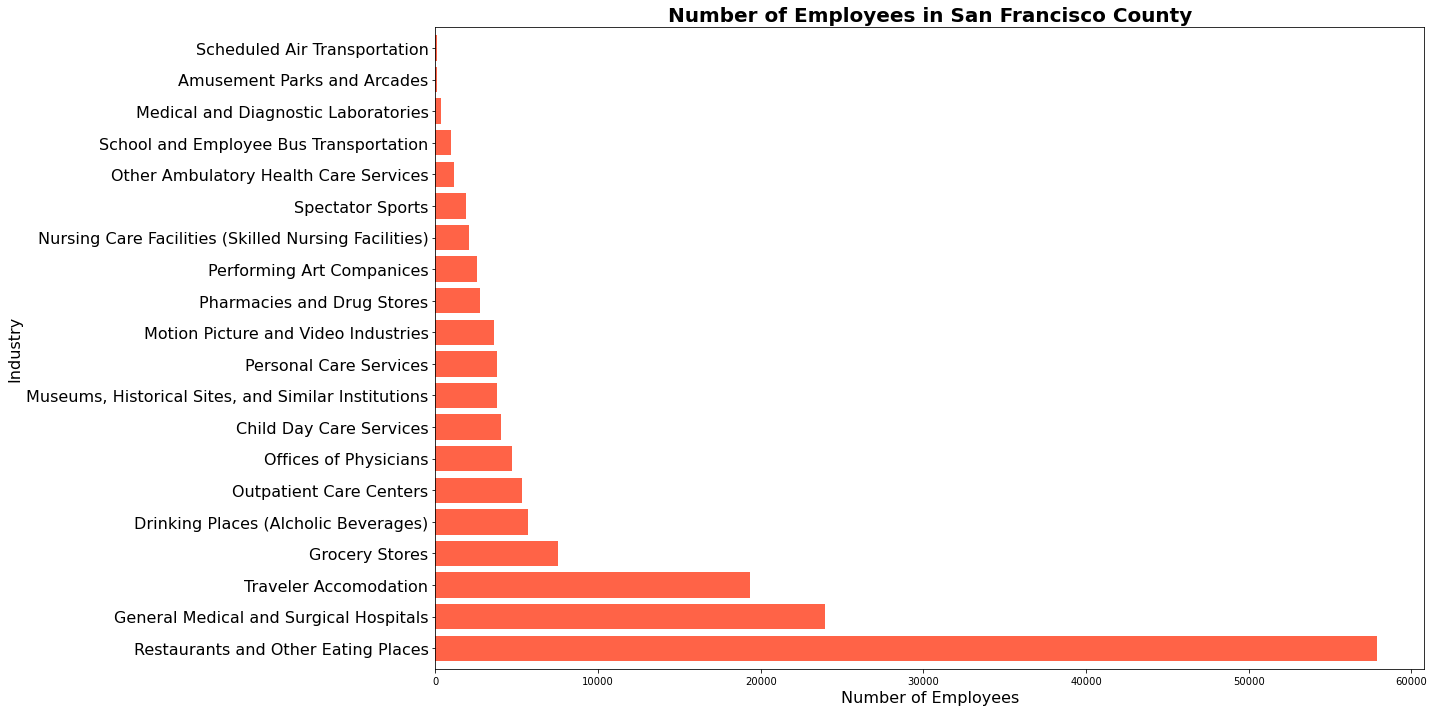

In [8]:
#same operation for San Francisco
New_SF_employment = LASF_employment.sort_values("San Francisco", ascending=False)
new_industry_list = New_SF_employment["Industry"].tolist()
new_SF_employed = New_SF_employment["San Francisco"].tolist()

SF_dict = New_SF_employment["San Francisco"]

SF_hbar = SF_dict.plot.barh(x=new_industry_list, y=new_SF_employed, facecolor="tomato", width=0.8, figsize=(20,10))
SF_hbar.set_yticklabels(new_industry_list, rotation="horizontal", fontsize=16)
SF_hbar.set_xlabel("Number of Employees", fontsize=16)
SF_hbar.set_ylabel("Industry", fontsize=16)
SF_hbar.set_title("Number of Employees in San Francisco County", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.savefig("Output_data/SF_employees.png", dpi=300)
plt.show()

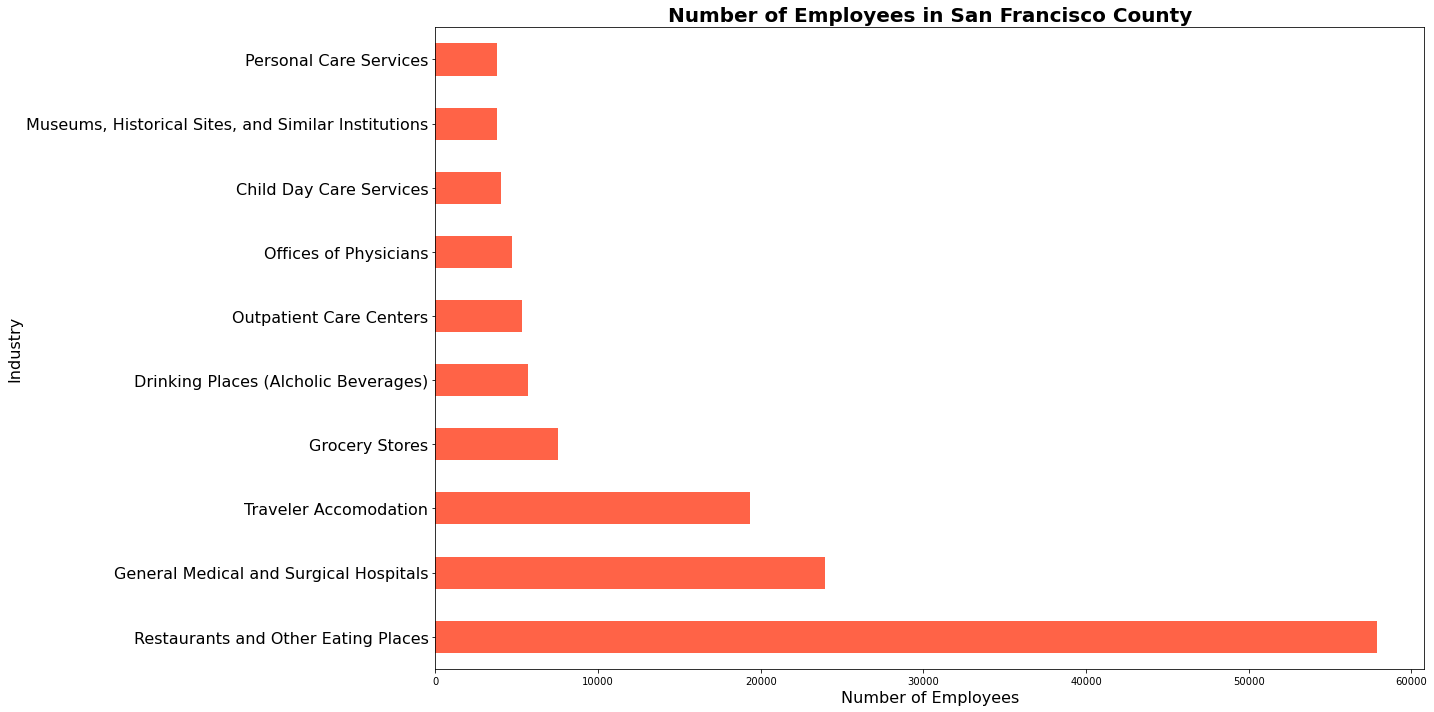

In [9]:
short_SF_industry = new_industry_list[0:10]
short_SF_employed = new_SF_employed[0:10]

short_SF_dict = New_SF_employment["San Francisco"].head(10)

short_SF_hbar = short_SF_dict.plot.barh(x=short_SF_industry, y=short_SF_employed, facecolor="tomato", figsize=(20,10))
short_SF_hbar.set_yticklabels(short_SF_industry, rotation="horizontal", fontsize=16)
short_SF_hbar.set_xlabel("Number of Employees", fontsize=16)
short_SF_hbar.set_ylabel("Industry", fontsize=16)
short_SF_hbar.set_title("Number of Employees in San Francisco County", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.savefig("Output_data/SF_top10_employees.png", dpi=300)
plt.show()

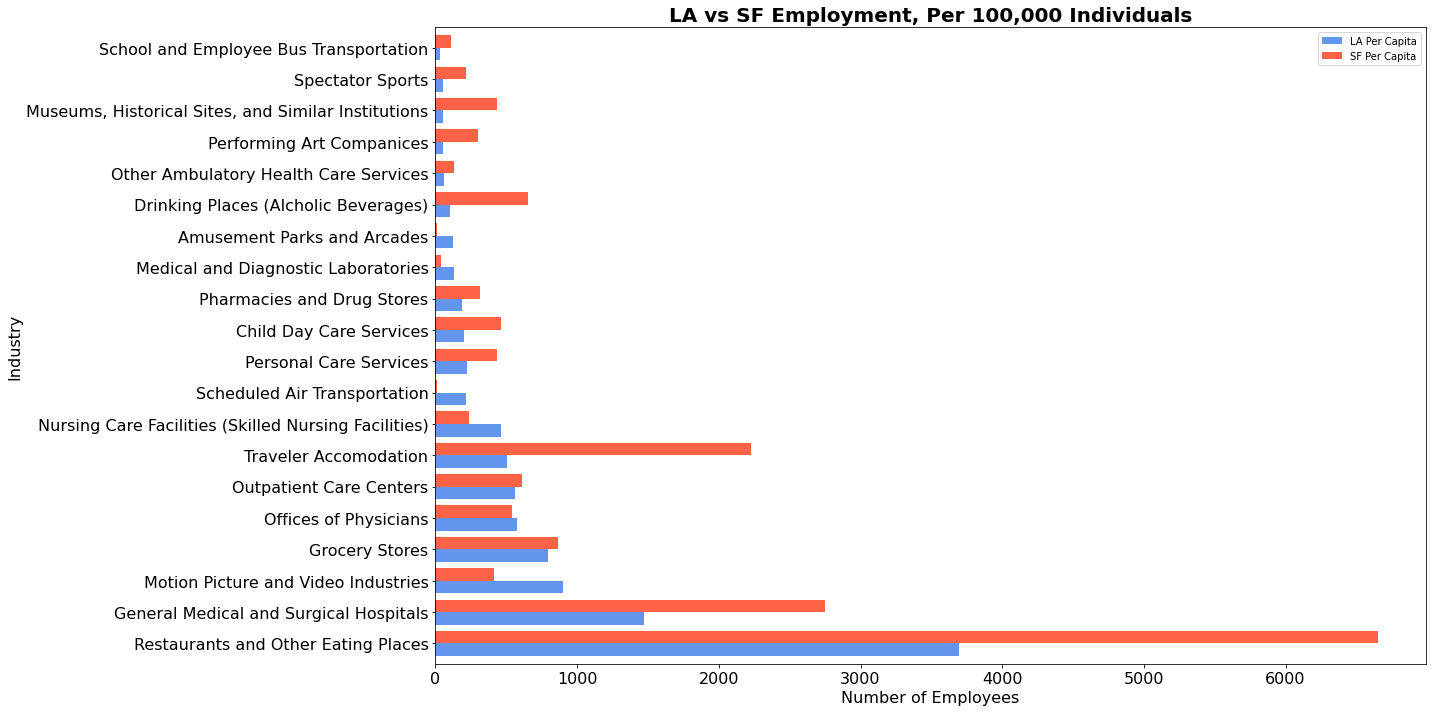

In [12]:
#plot both counties' Per Capita values on the same bar graph
per_capita = LASF_employment[["Industry", "LA Per Capita", "SF Per Capita"]]

#set index to Industry elements and drop index header, prep to plot whole dataframe to horizontal bar plot
per_capita = per_capita.set_index("Industry")
per_capita.rename_axis(None, inplace=True)

per_cap_plot = per_capita.plot.barh(color={"cornflowerblue", "tomato"}, width=0.8, figsize=(20,10), fontsize=16)
per_cap_plot.set_xlabel("Number of Employees", fontsize=16)
per_cap_plot.set_ylabel("Industry", fontsize=16)
per_cap_plot.set_title("LA vs SF Employment, Per 100,000 Individuals", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.savefig("Output_data/LASF_employees.png", dpi=300)
plt.show()

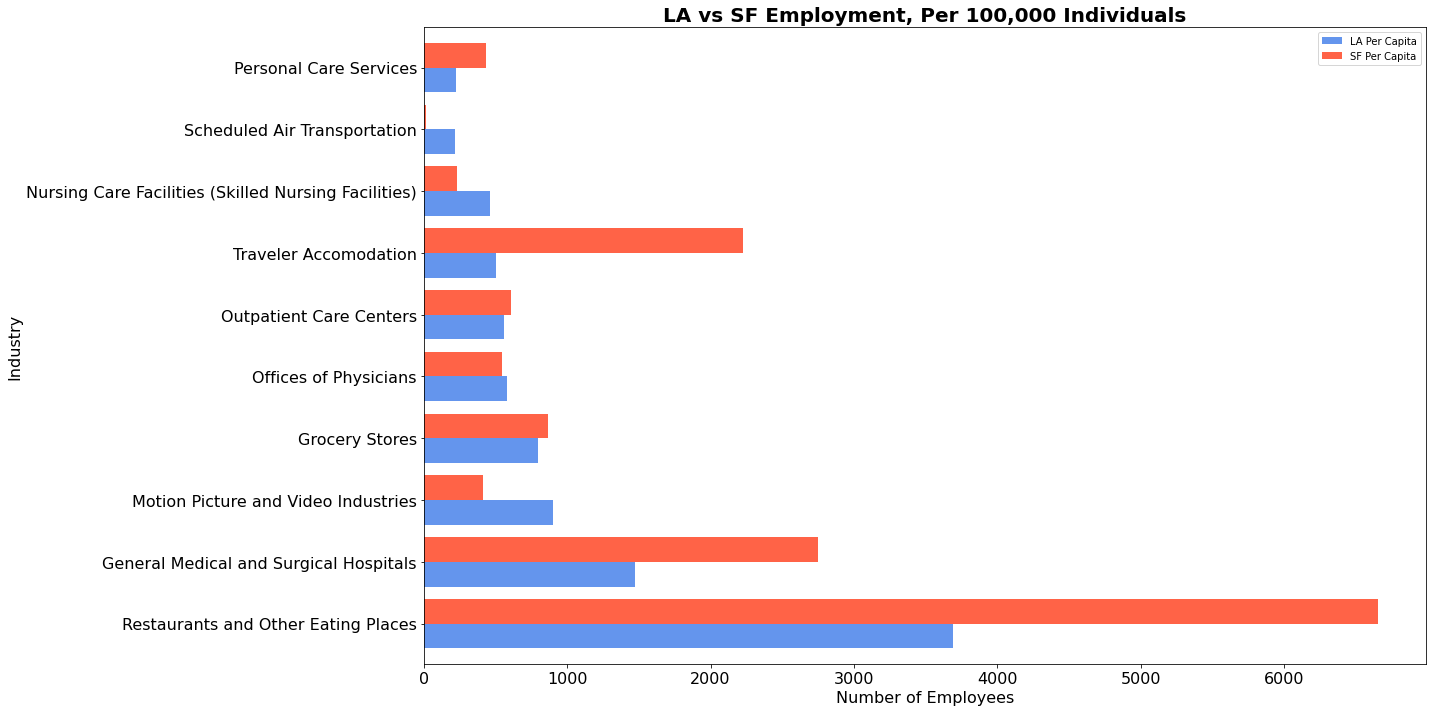

In [13]:
#same as above for the top 10 industries in Los Angeles County, compared to same industries in San Francisco County
per_ten = per_capita.head(10)

per_ten_plot = per_ten.plot.barh(color={"cornflowerblue", "tomato"}, width=0.8, figsize=(20,10), fontsize=16)
per_ten_plot.set_xlabel("Number of Employees", fontsize=16)
per_ten_plot.set_ylabel("Industry", fontsize=16)
per_ten_plot.set_title("LA vs SF Employment, Per 100,000 Individuals", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.savefig("Output_data/LASF_top10LA_employees.png", dpi=300)
plt.show()

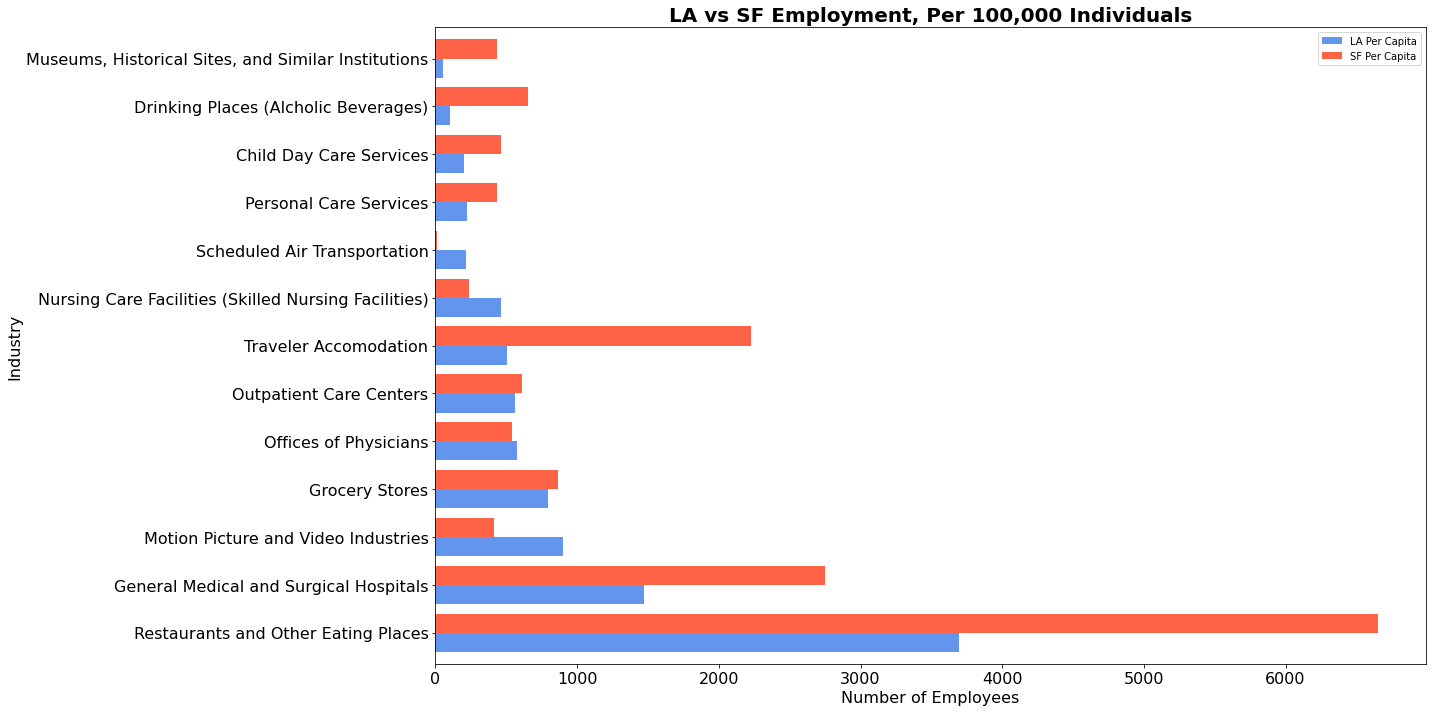

In [14]:
#drop by index the industries that did not make top 10 for either Los Angeles or San Francisco County
top_industry = per_capita.drop(["School and Employee Bus Transportation", "Spectator Sports",
                                "Performing Art Companices", "Other Ambulatory Health Care Services",
                                "Amusement Parks and Arcades", "Medical and Diagnostic Laboratories",
                                "Pharmacies and Drug Stores"])

#plot only industries that were either in the top 10 for Los Angeles or San Francisco county for comparison
top_thirteen = top_industry.plot.barh(color={"cornflowerblue", "tomato"}, width=0.8, figsize=(20,10), fontsize=16)
top_thirteen.set_xlabel("Number of Employees", fontsize=16)
top_thirteen.set_ylabel("Industry", fontsize=16)
top_thirteen.set_title("LA vs SF Employment, Per 100,000 Individuals", fontsize=20, fontweight="bold")

plt.tight_layout()
plt.savefig("Output_data/LASF_top13_employees.png", dpi=300)
plt.show()

In [ ]:
#messing around with EMP_F which is flag for number of employees. gives an odd none response that I don't understand
#employed_f = "EMP_F"
#test = requests.get(f"{url}?get={employed_f}&for=county:{LA}&in=state:{Cali}&NAICS2017=7225&key={census_key}").json()
#test

In [ ]:
#demo using acs to find population of LA County, for future reference; census isn't google
#url = "https://api.census.gov/data/2018/acs/acs5"
#population = "B01003_001E"
#Cali = "06"
#LA = "037"
#LA_query = f"{url}?get={population}&for=county:{LA}&in=state:{Cali}&key={census_key}"
#LA_pop_data = requests.get(LA_query)
#LA_pop_data.json()

#demo url for getting date from the CBP part of census.gov
#url = "https://api.census.gov/data/2018/cbp"
#hospitals = 6221
#CBP_query = f"{url}?get={num_employed}&for=county:{LA}&in=state:{Cali}&NAICS2017={hospitals}&key={census_key}"